In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Student's t Distribution

We left of last class with the following result:  Suppose that the $Y_1, Y_2, \dots, Y_n$ is some sample of size $n$ pulled from a population that is normally distributed with an unkown mean $\mu$ and variance $\sigma^2$. We then had the following results:

## $\bar{Y}$ 

The sample mean:  $$ \bar{Y} = \frac{1}{n} \sum Y_i $$ 

is a normally distributed random variable with mean $\mu$ and variance $\sigma^2 /n$.

## $S^2$ 

The sample variance:  $$ S^2 = \frac{1}{n-1} \sum (Y_i - \bar{Y})^2 $$

satisfies:  $$ \frac{(n-1) S^2}{\sigma^2} $$ 

is given by a $\chi^2$ distribution with $n-1$ degrees of freedom. $S^2$ and $\bar{Y}$ are also independent random variables.

## $T$

Again we would like to use the $Z$ statistic:

$$ Z = \sqrt{n} \frac{(\bar{Y} - \mu)}{\sigma} $$ 

to build confidence intervals about $\bar{Y}$ in which we predict $\mu$ will be because this will be a standard normal random variable. However the problem is we do not know $\sigma$. 

We can try to use $S$ to replace $\sigma$ but the issue is that while $\sigma$ is fixed, $S$ is itself a random variable. Which leads us to 

$$ T = \sqrt{n} \frac{ ( \bar{Y} - \mu)}{S} $$ 

which is a random variable given by the Student's t distribution with $n-1$ degrees of freedom. 

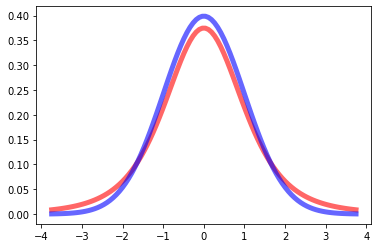

In [4]:
from scipy.stats import t
from scipy.stats import norm

df = 4
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.plot(x, norm.pdf(x), 
         'b-', lw=5, alpha =0.6 )

### Students t distribution

Student's t distribution captures the idea that because $S$ is itself moving, we have a bit less certainity about the result. Hence the tails of the distribution are larger and the center of the distribution is smaller. As the size of the sample increases this effect becomes less noticeable and the t distribution approaches the standard normal distirbution. More or less two things are happening as the sample increases - the $S^2$ is a better approximation of the $\sigma^2$ and the variance of $\bar{Y}$ is getting small. 

### Example

We have the weight of five high school wrestlers: 150, 152, 155, 155, and 160. Assuming that these are sampled from a normal distirbution with unkown mean 𝜇 and unkown variance $\sigma$. Let's use use the students t distribution to find an interval about $\bar{Y}$ where we are 90% certain $\mu$ is located. 

In [5]:
# Compute Ybar

data = [150, 152, 155, 155, 160]
Ybar = sum(data) / 5
Ybar

154.4

In [8]:
# Compute S^2

S2 = sum( [(data[i] - Ybar)**2 for i in range(5) ] )/4
S2

14.299999999999999

In [16]:
S = np.sqrt(S2)
S

3.7815340802378072

In [11]:
# Find the interval of the t distribution centered on the mean in which 90% of the values are contained.

# We use ppf to find the inverse of the cdf: Note that you need to pass it the number of degrees of freedom.

t.ppf(0.95, 4)

2.13184678133629

In [15]:
# It is worth using the cdf to check that we have this correct:

t.cdf(2.13185, 4) - t.cdf(-2.13185, 4)

0.9000003613774656

In [12]:
# It is worth pausing here and comparing this value to the standard normal value we would use if we knew sigma:

norm.ppf(0.95)

1.6448536269514722

So putting everything together, we are 90% confidence that the value of mu will satisfy:

$$ -2.13185 < \sqrt{5} \frac{\bar{Y} - \mu}{S} < 2.13185 $$

We then solve this inequality for $\mu$:

$$ \frac{-2.13185 S}{\sqrt{5}} + \bar{Y} < \mu < \frac{2.13185 S}{\sqrt{5}} + \bar{Y} $$


In [17]:
-2.13185*S/np.sqrt(5) + Ybar, 2.13185*S/np.sqrt(5) + Ybar

(150.79471451222653, 158.00528548777348)

## Comparing two variances

Suppose that $W_1$ and $W_2$ are to indepdent $\chi^2$-distributed random variables with $\nu_1$ and $\nu_2$ degrees of freedom. Then 

$$ F = \frac{ W_1/\nu_1}{W_2 / \nu_2} $$ is said to have an F distribution with $\nu_1$ numerator degrees of freedom and $\nu_2$ denomoninator degrees of freedom. 

In practice this is used by connecting it back to the sample and population variances, the ration of which is the respective $W_i/\nu_i$ in this result.

### Example 

Show that if we take independent samples of size $n_1 = 4$ and $n_2 = 8$ from two normal populations with the same variance, then find the upper bound $b$ such that 

$$ P( \frac{S_1^2}{S_2^2} < b ) = 0.95 $$

In [19]:
from scipy.stats import f

f.ppf(0.95, 3, 7)

4.346831399907815

In [20]:
f.cdf(4.347, 3, 7)

0.9500041782458821

This then gives us a test of whether two populations have the different variances or not. For example:

Let $1, 1, 3.4, 4$ and $25, 25, 27, 29, 29, 30, 30, 35, 35, 35$ be our two samples.

In [24]:
data1 = [1, 5, 7, 9]
data2 = [25, 25, 27, 29, 29, 30, 30, 35]

Y1bar = sum(data1)/4
Y2bar = sum(data2)/8

Y1bar, Y2bar

(5.5, 28.75)

In [25]:
S1 = np.sqrt( sum( [ (data1[i] - Y1bar)**2 for i in range(4)])/3 )
S2 = np.sqrt( sum( [ (data2[i] - Y2bar)**2 for i in range(8)])/7 )

S1, S2

(3.415650255319866, 3.24037034920393)

In [26]:
S1**2 / S2**2

1.1111111111111112

Because this is less than 4.35 we have insufficient evidence to conclude that the first variance is bigger than the second. 

Where as consider a different set of 4 data points for the first sample:


In [41]:
data3 = [1, 5, 10, 18]

In [42]:
Y3bar = sum(data3)/4
Y3bar

8.5

In [43]:
S3 = np.sqrt( sum( [ (data3[i] - Y3bar)**2 for i in range(4)])/3 )
S3

7.32575365861197

In [44]:
S3**2 / S2**2

5.111111111111111